# Optimistic Initial values
- no need for epsilon/random exploration
- initialize mean to very large value (overestimating the mean)\
- Be greedy
- Early in experiment:
    - Less data
    - Estimated mean is large
- Later in experiment:
    - Lots of data collected
    - Estimated mean continues to get smaller, but will it converage to true mean?
  


In [4]:
# #Pseudocode
# class Bandit:
#     def __init__(self, p):
#         self.p = p
#         self.p_estimate = 10 # Very large initial value

# # Greedy loop
# for n in range(NUM_TRIALS):
#     j = argmax(b.p_estimate for b in bandits)
#     ...

### Will the sample means converge?
No !
- Because we are being greedy, there is no guarantee we'll collect a large numner of samples for each bandit
- If the estimated mean of one bandit goes below the max estimated mean, we'll stop exploring it immediately

### Role of Initial Value
- High initial value = more exploration 
- less high = less exploration
- It's a **hyperparameter** that controls the amount of exploration

In [8]:
import matplotlib.pyplot as plt
import numpy as np

NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

class Bandit:
    def __init__(self, p):
        # p is the true win rate of each bandit
        self.p = p
        self.p_estimate = 5. # it should be a larve initial value
        self.N = 1. # Note: you have to initialize N to 1 to count 5 as a sample!!!!
        
    def pull(self):
        # Draw a 1 with probability p
        return np.random.random() < self.p
    
    def update(self, x):
        # x is the data for the bandit, either 0 or 1
        self.N += 1
        self.p_estimate = x/self.N + (self.N-1)/self.N * self.p_estimate

def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    rewards = np.zeros(NUM_TRIALS)

    for i in range(NUM_TRIALS):
        
        #use optimistic initial value to select the next badit
        j = np.argmax([b.p_estimate for b in bandits])

        # pull the arm for the j-th bandit 
        x = bandits[j].pull()

        # update the reward log
        rewards[i] = x

        # update the the estimate for j-th bandit
        bandits[j].update(x)
    
    
    for b in bandits:
        print("mean estimate:{0} (N={1})".format(b.p_estimate, b.N))
        
    #print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum()/ NUM_TRIALS)
    print("num_times selected each bandit:", [b.N for b in bandits])
    
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.ylim(0,1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()
    
    

mean estimate:0.7000000000000002 (N=10.0)
mean estimate:0.7083333333333333 (N=24.0)
mean estimate:0.751429431236836 (N=9969.0)
total reward earned: 7500.0
overall win rate: 0.75
num_times selected each bandit: [10.0, 24.0, 9969.0]


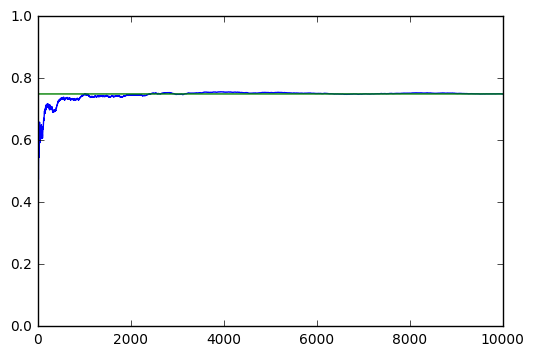

In [9]:
experiment()

- The sample mean converges to true mean of the optimal bandit
- For suboptimal bandits, if their estimated means go below this range: (5, 0.75), they will be stopping being updated